# Logistic Regression - Predict University Admission

## Load Data
#### Consists of marks from 2 exams - for 100 applicants
* Target Values take on binary values 0,1
* 1 indicates admission - 0 indicates no admission

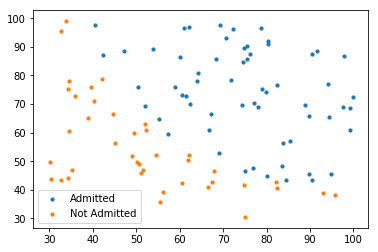

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

if __name__ == "__main__":
    data = load_data('https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt', None)
    
    X = data.iloc[:, :-1]
    
    y = data.iloc[:, -1]
    
    admitted = data.loc[y == 1]
    
    not_admitted = data.loc[y == 0]
    
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
    plt.legend()
    plt.show()

## Training the Model
#### Prepare the data for the model

In [3]:
X = np.c_[np.ones((X.shape[0], 1)), X]

y = y[:, np.newaxis]

theta = np.zeros((X.shape[1], 1))

#### Define some functions used to compute the cost

In [4]:
# activation function to map any real value between 0 - 1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# computes the weighted sum of inputs

def net_input(theta, x):
    return np.dot(x, theta)

# returns a probability after passing through sigmoid

def probability(theta, x):
    return sigmoid(net_input(theta, x))

#### Define the cost and the gradient function

In [13]:
def cost_function(theta, x, y):
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta, x)) - y)

#### Define a fit function - finds model parameters that minimize the cost function

In [15]:
import scipy.optimize

def fit(x, y, theta):
    opt_weights = scipy.optimize.fmin_tnc(func=cost_function, x0=theta,
                          fprime=gradient, args=(x, y.flatten()))
    return opt_weights[0]

parameters = fit(X, y, theta)

In [16]:
print(parameters)

[-25.16131865   0.20623159   0.20147149]


## Plotting the Decision Boundary

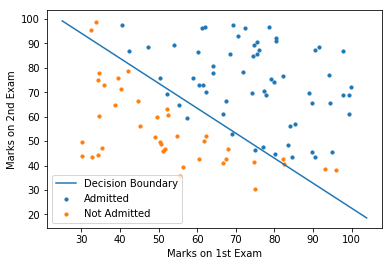

In [18]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.xlabel('Marks on 1st Exam')
plt.ylabel('Marks on 2nd Exam')
plt.legend()
plt.show()

## Find Accuracy of the Model

In [20]:
def predict(x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)

def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100

accuracy(X, y.flatten())

89.0

## Implement a Scikit-Learn Classifier
#### Compare results with the above model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(), predicted_classes) * 100.0
parameters = model.coef_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
print(accuracy)
print(parameters)

91.0
[[-2.85831439  0.05214733  0.04531467]]


# CONCLUSION
### The model utilizing scikit-learn provided at better accuracy (91% to 89%). The parameters are also much different from before. This is because sklearn logistic regression takes Regularization into account